<a href="https://colab.research.google.com/github/honmin123/BigData2024/blob/main/%E7%B3%96%E5%B0%BF%E7%97%85%E8%B3%87%E6%96%99__%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89_Cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

到目前為止我們已經介紹好幾種最常用的機器學習演算法。接下來我們想介紹的是，如何比較每一種演算法的好壞。先請教各位一個問題：今天如果我們要證明A同學的成績比B同學好。我們要用一次考試的成績還是用三次考試的成績會比較客觀？答案當然是，次數越多愈客觀。這就是交叉驗證的主要精神：透過讓機器學習多次的學習和預測取平均，來判斷哪一個比較好。

## 1 載入資料
本章所使用的資料是來自於sklearn內建的資料


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## plt.rcParams['font.sans-serif'] = ['DFKai-sb']
## plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
diabetes_cancer = load_diabetes()

print('\n'.join(diabetes_cancer['DESCR'].split('\n')[:15]))

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values


範例： 資料的特徵值  
資料裡一共有10個特徵值，相當多。不過由於我們不是醫療背景，對這些專有名詞的了解就無法太深入。

In [ ]:
print(diabetes_cancer['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
df = pd.DataFrame(data = diabetes_cancer['data'], columns = diabetes_cancer['feature_names'])
df['target'] = diabetes_cancer['target']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
# sns.pairplot(df, vars=['mean radius','mean texture','mean perimeter','mean area'],
             # hue='target', size=2);

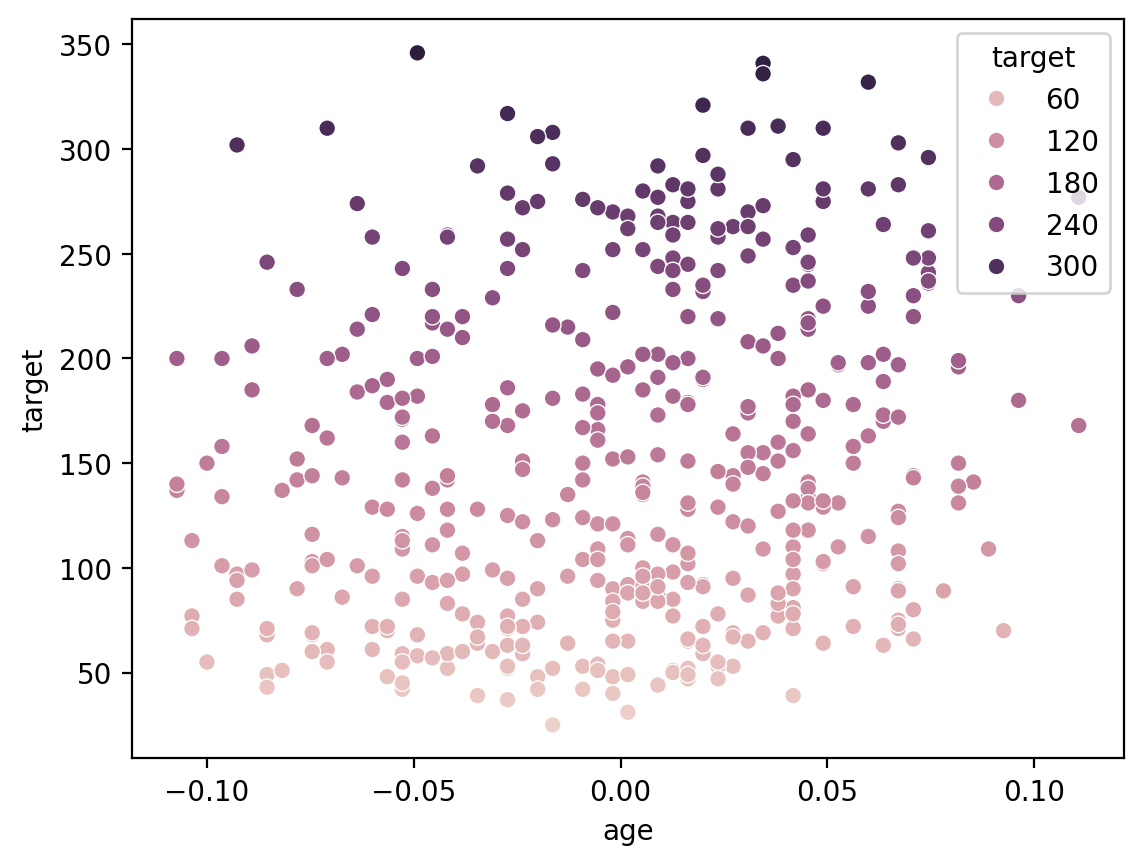

In [ ]:
sns.scatterplot(x='age', y='target', data=df, hue='target');

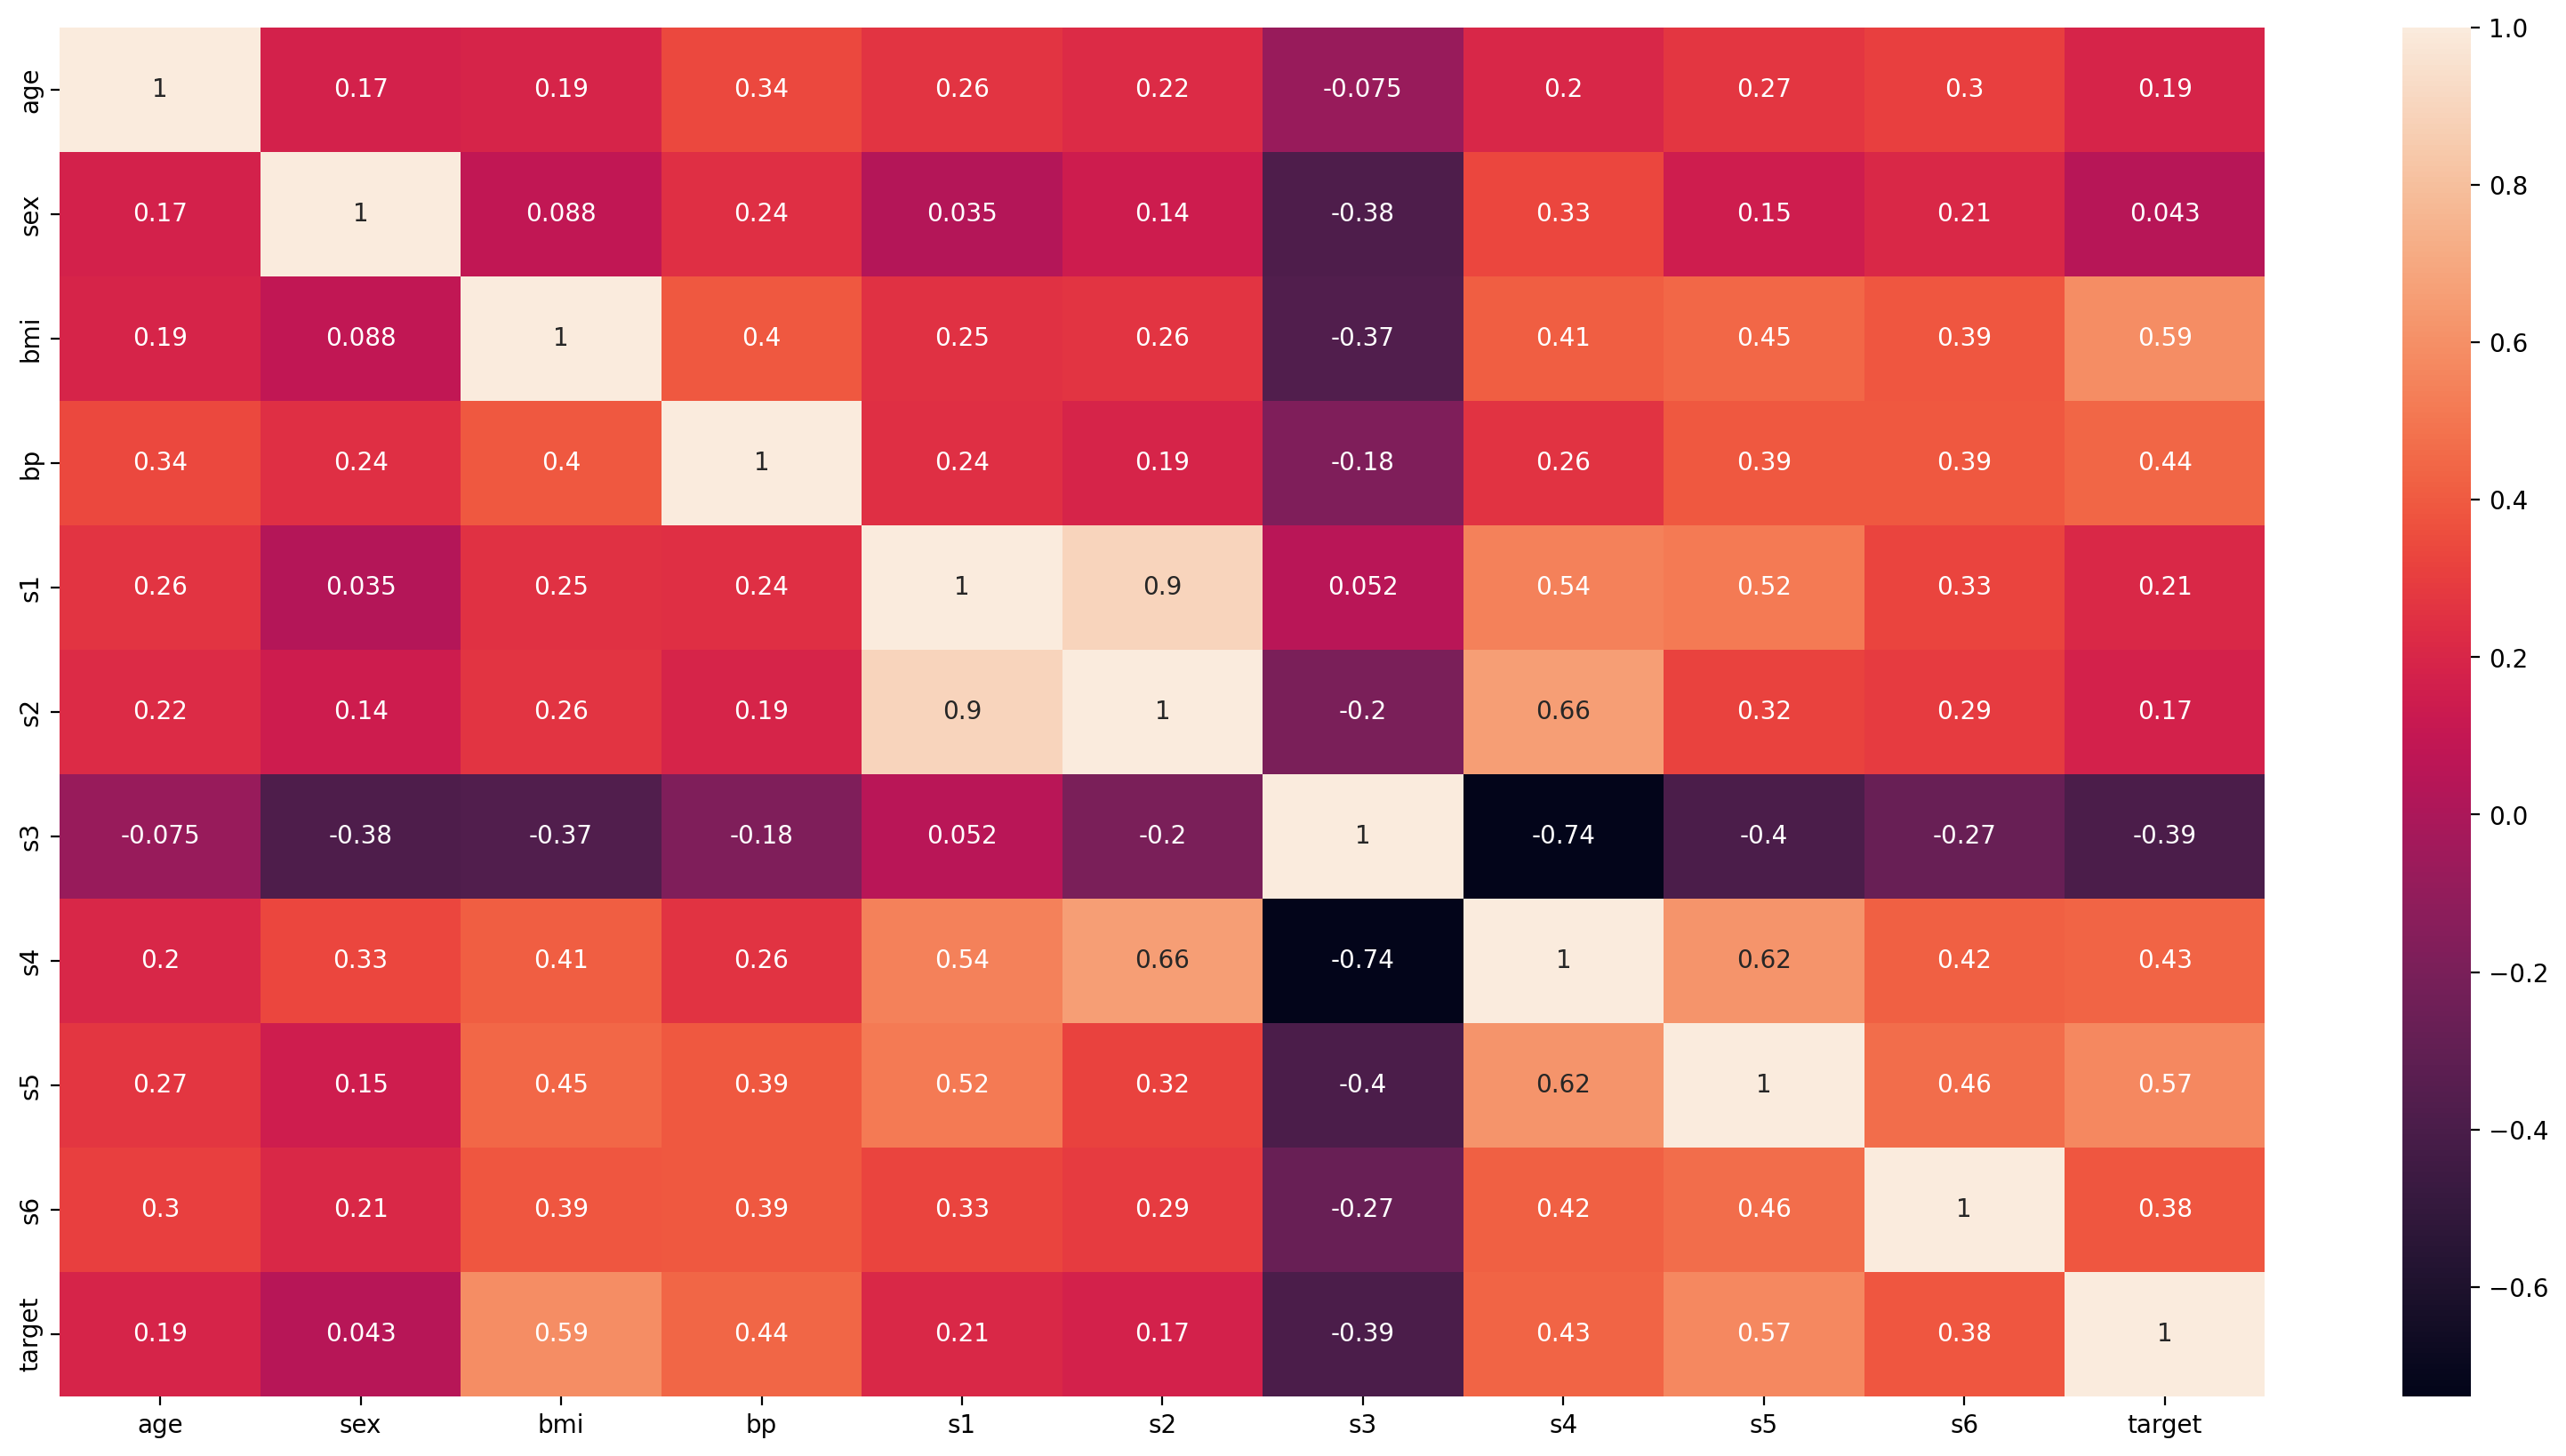

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True);

In [ ]:
df.corr()['target']

age       0.187889
sex       0.043062
bmi       0.586450
bp        0.441482
s1        0.212022
s2        0.174054
s3       -0.394789
s4        0.430453
s5        0.565883
s6        0.382483
target    1.000000
Name: target, dtype: float64

In [ ]:
X_cols = df.columns.drop('target')
X = df[X_cols]
y = df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

models = [LogisticRegression(), SVC(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(max_depth=5)]
scores = {}
for model in models:
    model_pl = make_pipeline(StandardScaler(), model)
    model_pl.fit(X_train, y_train)
    score = model_pl.score(X_test, y_test)
    scores[model.__class__.__name__] = score
scores

{'LogisticRegression': 0.0136986301369863,
 'SVC': 0.00684931506849315,
 'KNeighborsClassifier': 0.0,
 'DecisionTreeClassifier': 0.00684931506849315}

In [ ]:
pd.Series(scores).sort_values(ascending=False)

LogisticRegression        0.013699
SVC                       0.006849
DecisionTreeClassifier    0.006849
KNeighborsClassifier      0.000000
dtype: float64

In [ ]:
from sklearn.model_selection import KFold
data = np.arange(10,18)
kfold = KFold(n_splits=4)
for train_idx, test_idx in kfold.split(data):
    print(f'訓練集資料: {data[train_idx]}， 測試集資料:{data[test_idx]}')

訓練集資料: [12 13 14 15 16 17]， 測試集資料:[10 11]
訓練集資料: [10 11 14 15 16 17]， 測試集資料:[12 13]
訓練集資料: [10 11 12 13 16 17]， 測試集資料:[14 15]
訓練集資料: [10 11 12 13 14 15]， 測試集資料:[16 17]


In [ ]:
kfold = KFold(n_splits=5)
model_pl_lr = make_pipeline(StandardScaler(), LogisticRegression())

scores = []
for train_idx, test_idx in kfold.split(X_train, y_train):
    model_pl_lr.fit(X_train_df.iloc[train_idx], y_train.iloc[train_idx])
    scores.append(model_pl_lr.score(X_train_df.iloc[test_idx], y_train.iloc[test_idx]))
print(f'5折交叉驗證的結果{np.mean(scores)}')

5折交叉驗證的結果0.01016949152542373


In [ ]:
from sklearn.model_selection import cross_val_score
model_pl_lr = make_pipeline(StandardScaler(), LogisticRegression())
scores = cross_val_score(model_pl_lr, X_train, y_train, scoring='accuracy', cv=5)
print(f'5折交叉驗證的每次結果 {scores}')
print(f'5折交叉驗證的平均結果{np.mean(scores)}')

5折交叉驗證的每次結果 [0.         0.01694915 0.01694915 0.         0.03389831]
5折交叉驗證的平均結果0.013559322033898305


In [ ]:
scores = cross_val_score(model_pl_lr, X_train, y_train, scoring='recall', cv=5)
print(f'5折交叉驗證的每次結果 {scores}')
print(f'5折交叉驗證的平均結果{np.mean(scores)}')

5折交叉驗證的每次結果 [nan nan nan nan nan]
5折交叉驗證的平均結果nan


In [ ]:
models = [LogisticRegression(), SVC(),
          KNeighborsClassifier(), DecisionTreeClassifier(max_depth=10)]
scores = {}
for model in models:
    model_pl = make_pipeline(StandardScaler(), model)
    score = cross_val_score(model_pl, X_train, y_train, scoring='accuracy', cv=5)
    scores[model.__class__.__name__] = score.mean()
pd.Series(scores).sort_values(ascending=False)

LogisticRegression        0.013559
SVC                       0.010169
DecisionTreeClassifier    0.006780
KNeighborsClassifier      0.000000
dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# model_pl_lr = make_pipeline(StandardScaler(), LogisticRegression())
model_pl_lr = make_pipeline(StandardScaler(), SVC())
model_pl_lr.fit(X_train, y_train)
y_pred = model_pl_lr.predict(X_test)
print('正確率：', accuracy_score(y_test, y_pred).round(3))
print('混亂矩陣')
print(confusion_matrix(y_test, y_pred))
print('綜合報告')
print(classification_report(y_test, y_pred))

正確率： 0.007
混亂矩陣
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
綜合報告
              precision    recall  f1-score   support

        37.0       0.00      0.00      0.00         1
        42.0       0.00      0.00      0.00         1
        48.0       0.00      0.00      0.00         2
        51.0       0.00      0.00      0.00         1
        52.0       0.00      0.00      0.00         3
        53.0       0.00      0.00      0.00         1
        55.0       0.00      0.00      0.00         0
        59.0       0.00      0.00      0.00         1
        60.0       0.00      0.00      0.00         2
        61.0       0.00      0.00      0.00         2
        63.0       0.00      0.00      0.00         3
        64.0       0.00      0.00      0.00         1
        65.0       0.00      0.00      0.00         1
        67.0       0.00      0.00      0.00         1
        68.0       0.00      0.00      0.00     

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 加载糖尿病数据集
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# 将目标变量转换为二元分类（中位数以上为1，以下为0）
df['target'] = (df['target'] > df['target'].median()).astype(int)

# 特征和目标变量
X = df.drop('target', axis=1)
y = df['target']

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建包含标准化步骤的逻辑回归模型流水线
model_pl_lr = make_pipeline(StandardScaler(), LogisticRegression())

# 训练模型
model_pl_lr.fit(X_train, y_train)

# 预测
y_pred = model_pl_lr.predict(X_test)

# 评估
print('准确率：', accuracy_score(y_test, y_pred).round(3))
print('混淆矩阵')
print(confusion_matrix(y_test, y_pred))
print('综合报告')
print(classification_report(y_test, y_pred))

准确率： 0.73
混淆矩阵
[[36 13]
 [11 29]]
综合报告
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



In [ ]:
model_tree = DecisionTreeClassifier(max_depth=10)
model_tree.fit(X_train, y_train)
pd.Series(model_tree.feature_importances_,
            index=X.columns).sort_values(ascending=False).head()


bmi    0.139645
s5     0.127181
s2     0.114973
s1     0.107807
s6     0.107503
dtype: float64

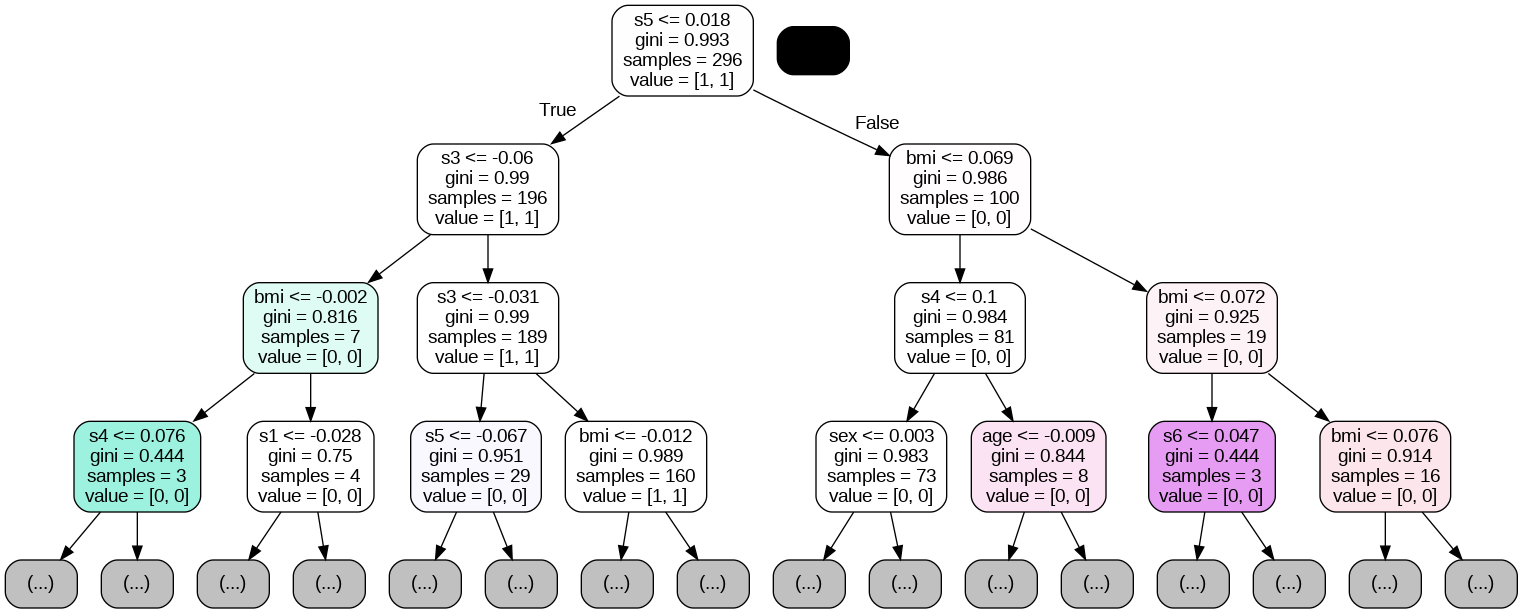

In [ ]:
import re

from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

features = X.columns
class_names = ['old', 'young']
dot_data = export_graphviz(model_tree, out_file=None,
                           feature_names=features,
                           proportion = False,
                           max_depth=3,

                           filled=True,
                           rounded=True)
dot_data = re.sub(r'value = \[([^\]]+)\]', lambda match: 'value = [' + ', '.join(match.group(1).split(', ')[:2]) + ']', dot_data)

graph = pydot.graph_from_dot_data(dot_data)
graph[0].write_png('tumor.png')
Image(graph[0].create_png(), width=800)


# Example for regression task

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100



In [ ]:
# 生成範例數據
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # 獨立變數
y = 2.5 * X.flatten() + np.random.randn(100) * 2  # 目標變數

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# 訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 計算評估指標
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
smape = symmetric_mean_absolute_percentage_error(y_test, y_pred)

# 打印結果
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Symmetric Mean Absolute Percentage Error (SMAPE): {smape}')

Mean Squared Error (MSE): 3.671012987885716
Root Mean Squared Error (RMSE): 1.915988775511411
R^2 Score: 0.896480483165161
Mean Absolute Percentage Error (MAPE): 27.714819342949383
Symmetric Mean Absolute Percentage Error (SMAPE): 18.666531311605222
